In [1]:
parameter_file = '../parameters/params.yaml'

import yaml
import sys
import glob
import os
import seaborn as sns
from os.path import join, basename
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

print(doc)
os.chdir(doc["results"])
samples = pd.read_csv('../parameters/samples.tsv',sep='\t')

from collections import defaultdict

from mplh.fig_utils import helper_save, legend_from_color
from mplh.color_utils import get_colors




{'data_folder': '/data/isshamie/TSS/NCBI_PICR_103_Processed/', 'results': '/data/isshamie/TSS/Analysis/Analysis_03302020/Results/', 'figures': '/data/isshamie/TSS/Analysis/Analysis_03302020/Results/', 'RNAseq_QC': '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/2017_12_15_hamster_Seq/fastqc/', 'RNAseq_folder': '/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/2017_12_15_hamster_Seq/', 'pipeline_path': '/data/isshamie/TSS/Analysis/src/', 'tissues': 'BMDM1hKLA,BMDMwt,Brain,FemaleReproductive,Heart,Kidney,Liver,Lung,MiscOrgans,Muscle,Pancreas,Spleen,CHO', 'ref_fa': '/data/isshamie/genome/hamster/ncbi_anno_103/GCF_003668045.1_CriGri-PICR/GCF_003668045.1_CriGri-PICR_genomic.fna', 'annotation': '/data/isshamie/genome/hamster/ncbi_anno_103/GCF_003668045.1_CriGri-PICR/GCF_003668045.1_CriGri-PICR_genomic.gff', 'annotation_gtf': '/data/isshamie/genome/hamster/ncbi_anno_103/GCF_003668045.1_CriGri-PICR/GCF_003668045.1_CriGri-PICR_genomic.gtf', 'alt_annotation': '/data/isshamie/genome/hamster/n

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:13: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  del sys.path[0]


In [2]:
os.chdir(doc["results"])
## Outdir
outdir = "gene_cumsum_plot"
if not os.path.exists(outdir):
    os.mkdir(outdir)
    
f_save = join(outdir, "Gene_log2_tpm_cumsum")

### Load gene_lengths

In [3]:
gene_l = pd.read_csv("genome/picr/gcf/gene_lengths.csv",index_col=0)

In [4]:
file_path = join(doc["data_folder"],"RNAseq")


qc_dir = join(file_path,"QC")
multiqc_dir = join(file_path,"multiqc")

trim_qc_dir = join(file_path,"trim_QC")
trim_multiqc_dir = join(file_path,"trim_multiqc")

bam_dir = join(file_path, "sortBam")
ht_dir = join(file_path, 'htseq')
ht_reverse_dir = join(file_path, 'htseq_rev')
RNA_SeQC = join(file_path,'RNA_SeQC')

In [5]:
# tpm <- function(counts, lengths) {
#   rate <- counts / lengths
#   rate / sum(rate) * 1e6
# }

def to_tpm(counts,lengths):
    rate = counts.apply(lambda x: x/lengths.loc[x.name, "Length"], axis=1)
    return (rate/rate.sum(axis=0))*1e6



In [6]:
tpm = pd.DataFrame()

for bam_f in glob.glob(ht_reverse_dir+"/*.count.txt"):
    print(bam_f)
    sid = basename(bam_f).replace('.count.txt','') #"_".join(basename(bam_f).split("_")[1:3])
    print(sid)
    #NL9_Kidney_S9_L006_R1_001.fastq.sort
    count_rev_f = join(ht_reverse_dir, sid +'.count.txt')

    df_rev = pd.read_csv(count_rev_f,sep="\t", header=None, index_col=0)
    df_rev = df_rev[~(df_rev.index.str.contains("_"))]
    df_rev.columns = [sid]

    tpm = pd.concat((tpm,df_rev), axis=1)

tpm = tpm.loc[tpm.index.intersection(gene_l.index)]

## Convert from counts to tpm

tpm = to_tpm(tpm, gene_l)

/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/htseq_rev/Muscle_S8.count.txt
Muscle_S8
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/htseq_rev/Brain2_S7.count.txt
Brain2_S7
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/htseq_rev/Lung_S4.count.txt
Lung_S4
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/htseq_rev/Heart_S6.count.txt
Heart_S6
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/htseq_rev/Misc_S10.count.txt
Misc_S10
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/htseq_rev/Brain7-1_S11.count.txt
Brain7-1_S11
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/htseq_rev/Liver_S5.count.txt
Liver_S5
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/htseq_rev/ReproductiveTract_S2.count.txt
ReproductiveTract_S2
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/htseq_rev/Kidney_S9.count.txt
Kidney_S9
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/htseq_rev/Spleen_S3.count.txt
Spleen_S3
/data/isshamie/TSS/NCBI_PICR_103_Processed/RNAseq/htseq_rev/Pancreas_S1.count.txt


In [7]:
print(len(tpm.index.intersection(gene_l.index)))
print(len(tpm))
print(len(gene_l.index))
print(tpm.sum())

32426
32426
32427
Muscle_S8               1000000.0
Brain2_S7               1000000.0
Lung_S4                 1000000.0
Heart_S6                1000000.0
Misc_S10                1000000.0
Brain7-1_S11            1000000.0
Liver_S5                1000000.0
ReproductiveTract_S2    1000000.0
Kidney_S9               1000000.0
Spleen_S3               1000000.0
Pancreas_S1             1000000.0
dtype: float64


## Get mean and var for tissues 

In [8]:
rna_samples = samples[samples['Experiment']=='RNASeq']
rna_samples

,Unnamed: 0,Experiment,Full,Name,Tissue
67,NL10_Misc_S10_L006_R1_001.fastq.gz,RNASeq,NL10_Misc_S10_L006_R1_001.fastq.gz,Misc_RNASeq1,MiscOrgans
68,NL11_Brain7-1_S11_L006_R1_001.fastq.gz,RNASeq,NL11_Brain7-1_S11_L006_R1_001.fastq.gz,Brain_RNASeq1,Brain
69,NL1_Pancreas_S1_L006_R1_001.fastq.gz,RNASeq,NL1_Pancreas_S1_L006_R1_001.fastq.gz,Pancreas_RNASeq1,Pancreas
70,NL2_ReproductiveTract_S2_L006_R1_001.fastq.gz,RNASeq,NL2_ReproductiveTract_S2_L006_R1_001.fastq.gz,ReproductiveTract_RNASeq1,FemaleReproductive
71,NL3_Spleen_S3_L006_R1_001.fastq.gz,RNASeq,NL3_Spleen_S3_L006_R1_001.fastq.gz,Spleen_RNASeq1,Spleen
72,NL4_Lung_S4_L006_R1_001.fastq.gz,RNASeq,NL4_Lung_S4_L006_R1_001.fastq.gz,Lung_RNASeq1,Lung
73,NL5_Liver_S5_L006_R1_001.fastq.gz,RNASeq,NL5_Liver_S5_L006_R1_001.fastq.gz,Liver_RNASeq1,Liver
74,NL6_Heart_S6_L006_R1_001.fastq.gz,RNASeq,NL6_Heart_S6_L006_R1_001.fastq.gz,Heart_RNASeq1,Heart
75,NL7_Brain2_S7_L006_R1_001.fastq.gz,RNASeq,NL7_Brain2_S7_L006_R1_001.fastq.gz,Brain_RNASeq2,Brain
76,NL8_Muscle_S8_L006_R1_001.fastq.gz,RNASeq,NL8_Muscle_S8_L006_R1_001.fastq.gz,Muscle_RNASeq1,Muscle


In [9]:
color_map, name_map, p = get_colors(scheme='categorical', names=rna_samples["Tissue"].values, n_colors=len(rna_samples["Tissue"].unique()), use_white=False)


Generating palette: 100% |######################################| Time: 0:00:08


In [10]:
tis_map = dict()
for name in tpm.columns.values:
    print(name)
    for _, val in rna_samples.iterrows():
        if name in val['Full']:
            if name in tis_map:
                print('Already here', name)
            else:
                tis_map[name] = val["Tissue"]
tis_rev = defaultdict(list)
for t in tis_map:
    tis_rev[tis_map[t]].append(t)
print(tis_rev)
tis_map

Muscle_S8
Brain2_S7
Lung_S4
Heart_S6
Misc_S10
Brain7-1_S11
Liver_S5
ReproductiveTract_S2
Kidney_S9
Spleen_S3
Pancreas_S1
defaultdict(<class 'list'>, {'Muscle': ['Muscle_S8'], 'Brain': ['Brain2_S7', 'Brain7-1_S11'], 'Lung': ['Lung_S4'], 'Heart': ['Heart_S6'], 'MiscOrgans': ['Misc_S10'], 'Liver': ['Liver_S5'], 'FemaleReproductive': ['ReproductiveTract_S2'], 'Kidney': ['Kidney_S9'], 'Spleen': ['Spleen_S3'], 'Pancreas': ['Pancreas_S1']})


{'Muscle_S8': 'Muscle',
 'Brain2_S7': 'Brain',
 'Lung_S4': 'Lung',
 'Heart_S6': 'Heart',
 'Misc_S10': 'MiscOrgans',
 'Brain7-1_S11': 'Brain',
 'Liver_S5': 'Liver',
 'ReproductiveTract_S2': 'FemaleReproductive',
 'Kidney_S9': 'Kidney',
 'Spleen_S3': 'Spleen',
 'Pancreas_S1': 'Pancreas'}

A. Get mean for each gene over tissues (average the brain)  
B. For each tissue : rank order the genes for that tissue  
C. calculate to cumulative sum.  
D. plot the cumulative plot with variance   

## Log values

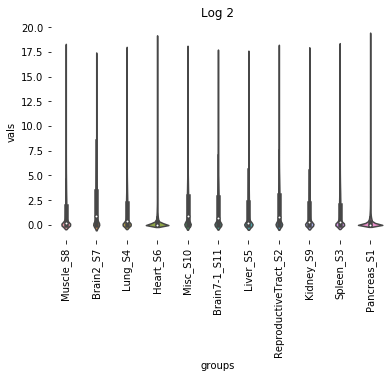

In [16]:
tpm_log = np.log2(tpm+1)
#df.melt(var_name='groups', value_name='vals')
sns.violinplot(x="groups", y="vals", data=tpm_log.melt(var_name='groups', value_name='vals'))
plt.xticks(rotation=90)
plt.title("Log 2")
helper_save(join(outdir,"Log2_rna_count_violinplot"))

## log x-axis

MiscOrgans
Brain
Pancreas
FemaleReproductive
Spleen
Lung
Liver
Heart
Muscle
Kidney


/home/isshamie/software/homebrew/matplotlib_helper/mplh/fig_utils.py:56: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  dpi=dpi, pad_inches=0.1)
/home/isshamie/software/homebrew/matplotlib_helper/mplh/fig_utils.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f_save + '.svg')


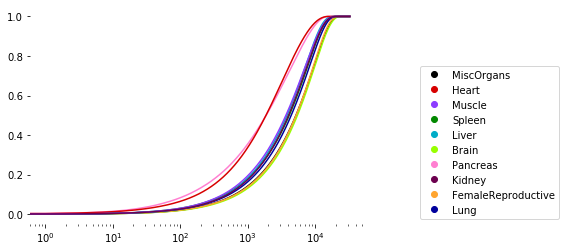

In [15]:
tis_cum_plot_mean = {}
tis_cum_plot_var = {}
f, ax = plt.subplots()
curr_cum_dict = {}
for tis in rna_samples["Tissue"].unique():
    print(tis)
    curr_df = tpm_log.loc[:, tis_rev[tis]]
    tis_cum_plot_mean[tis] = curr_df.mean(axis=1)
    tis_cum_plot_var[tis] = curr_df.var(axis=1)
    curr_cum = (tis_cum_plot_mean[tis].sort_values(ascending=False).cumsum()/(tis_cum_plot_mean[tis].sum()))
    curr_cum_dict[tis] = curr_cum.values
    sns.lineplot(data = curr_cum.reset_index(drop=True), ax=ax, color=color_map[tis])
    
legend_from_color(color_map, curr_ax=ax)
ax.set_xscale('log')

helper_save(f_save)
pd.DataFrame(curr_cum_dict).to_csv(f_save+'.csv')

### Raw TPM

MiscOrgans
Brain
Pancreas
FemaleReproductive
Spleen
Lung
Liver
Heart
Muscle
Kidney


/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


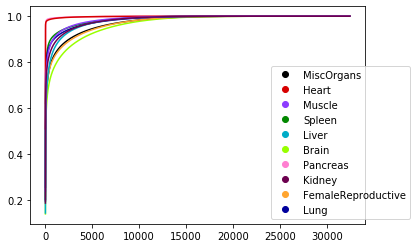

In [13]:
tis_cum_plot_mean = {}
tis_cum_plot_var = {}
f, ax = plt.subplots()
for tis in rna_samples["Tissue"].unique():
    print(tis)
    curr_df = tpm.loc[:, tis_rev[tis]]
    tis_cum_plot_mean[tis] = curr_df.mean(axis=1)
    tis_cum_plot_var[tis] = curr_df.var(axis=1)
    curr_cum = (tis_cum_plot_mean[tis].sort_values(ascending=False).cumsum()/(tis_cum_plot_mean[tis].sum()))
    sns.lineplot(data = curr_cum.reset_index(drop=True), ax=ax, color=color_map[tis])
legend_from_color(color_map, curr_ax=ax)

## Log TPM (no logscale)

MiscOrgans
Brain
Pancreas
FemaleReproductive
Spleen
Lung
Liver
Heart
Muscle
Kidney


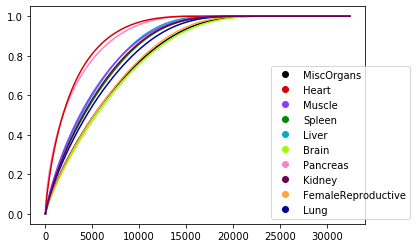

In [14]:
tis_cum_plot_mean = {}
tis_cum_plot_var = {}
f, ax = plt.subplots()
for tis in rna_samples["Tissue"].unique():
    print(tis)
    curr_df = tpm_log.loc[:, tis_rev[tis]]
    tis_cum_plot_mean[tis] = curr_df.mean(axis=1)
    tis_cum_plot_var[tis] = curr_df.var(axis=1)
    curr_cum = (tis_cum_plot_mean[tis].sort_values(ascending=False).cumsum()/(tis_cum_plot_mean[tis].sum()))
    sns.lineplot(data = curr_cum.reset_index(drop=True), ax=ax, color=color_map[tis])
legend_from_color(color_map, curr_ax=ax)